# test of meta learner

In [1]:
import json
import os, time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # 交叉检验
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
from matplotlib.ticker import MaxNLocator

In [33]:
arch_single_meta = []
recall20_list_meta = []
with open('results_meta_arch.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    # print()
# for i in range(len(lines)):

for line in lines:
    line.split('\n')[0].split('::')
    

In [5]:
import torch
num_users, num_items = 943, 1682
all_users = torch.tensor(list(range(num_users)), dtype=torch.int64).repeat_interleave(num_items)
all_items = torch.tensor(list(range(num_items)), dtype=torch.int64).repeat(num_users)

In [6]:
all_users, all_users.shape, all_items, all_items.shape

(tensor([  0,   0,   0,  ..., 942, 942, 942]),
 torch.Size([1586126]),
 tensor([   0,    1,    2,  ..., 1679, 1680, 1681]),
 torch.Size([1586126]))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


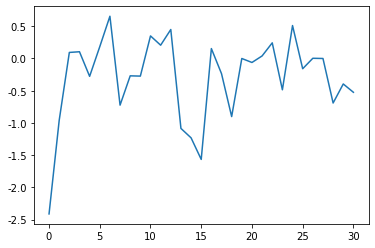

In [2]:
scores = [-2.411805555555556, -0.9605971607712778, 0.0937869174810011, 0.10459267515004633, -0.2771639880786909, 0.18331511893509767, 0.6554829976520875, -0.7238722451790629, -0.26915119489039685, -0.27342421343537393, 0.35013079316320106, 0.2063070452739949, 0.44968970509444484, -1.085086200599021, -1.2314739243274886, -1.5659848166003472, 0.15384055267294527, -0.23589458802728047, -0.9013955576263954, 0.0, -0.06190820020756882, 0.0395866896802447, 0.24265754135439987, -0.48559684389466695, 0.5111953298834797, -0.15905665910062705, 0.0032123903216523253, 0.0, -0.6909920271589549, -0.39541432808934585, -0.5244813974972706]
plt.plot(scores)

In [4]:
arches_encoding_reduced = open('save/ml-100k-arches-rank.txt', 'r').readlines() # reduced arch space
remaining_arches_encoding = list(map(lambda x: x.strip(), arches_encoding_reduced))
# print(remaining_arches_encoding)
from controller import sample_arch_cf
with open('save/arches_reduced.txt', 'w') as f: # reduced arch space
    for arch_enc in remaining_arches_encoding:
        arch_single = sample_arch_cf()
        arch_single['cf'], arch_single['emb']['u'], arch_single['emb']['i'], arch_single['ifc'], arch_single['pred'] = arch_enc.split('_')
        if arch_single['ifc'] in ['mul', 'concat']:
            continue
        elif arch_single['cf'] in ['ui']:
            continue
        else:
            # print(arch_enc)
            f.write(arch_enc+'\n')

In [21]:
# from cgitb import handler
import pynvml
pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(4)
meminfo = pynvml.nvmlDeviceGetMemoryInfo(handle)
tu = np.array([meminfo.total, meminfo.used, meminfo.free])
tu/(1024**3) # rtx 3090

array([24.        ,  0.30145264, 23.69854736])

In [23]:
['123']*100


['123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123',
 '123']

## performance vs time

In [11]:
performance_reduced = np.array([1,2,3,4,-2,3,2,1,3,7,8,6,7,3,1,10,11,-1,12,12,13,14,15])
performance_reduced_top5 = []
for i in range(len(performance_reduced)):
    if i == 0:
        item = performance_reduced[0]
    elif i <= 5:
        item = np.min(performance_reduced[:i])
    else:
        print(f'performance_reduced[:{i}]: {performance_reduced[:i]}')
        top5 = performance_reduced[np.argpartition(performance_reduced[:i], -5)[-5:]]
        print(f'top5 list: {top5}')
        item = top5
        # item = np.max(top5)
        # item = performance_reduced[np.argpartition(performance_reduced[:i], -5)[:-5]]
    performance_reduced_top5.append(item)

performance_reduced[:6]: [ 1  2  3  4 -2  3]
top5 list: [1 3 4 2 3]
performance_reduced[:7]: [ 1  2  3  4 -2  3  2]
top5 list: [2 4 3 3 2]
performance_reduced[:8]: [ 1  2  3  4 -2  3  2  1]
top5 list: [2 2 3 3 4]
performance_reduced[:9]: [ 1  2  3  4 -2  3  2  1  3]
top5 list: [2 3 3 3 4]
performance_reduced[:10]: [ 1  2  3  4 -2  3  2  1  3  7]
top5 list: [3 3 3 4 7]
performance_reduced[:11]: [ 1  2  3  4 -2  3  2  1  3  7  8]
top5 list: [3 4 3 7 8]
performance_reduced[:12]: [ 1  2  3  4 -2  3  2  1  3  7  8  6]
top5 list: [3 4 6 8 7]
performance_reduced[:13]: [ 1  2  3  4 -2  3  2  1  3  7  8  6  7]
top5 list: [4 6 7 7 8]
performance_reduced[:14]: [ 1  2  3  4 -2  3  2  1  3  7  8  6  7  3]
top5 list: [4 6 7 7 8]
performance_reduced[:15]: [ 1  2  3  4 -2  3  2  1  3  7  8  6  7  3  1]
top5 list: [4 6 7 8 7]
performance_reduced[:16]: [ 1  2  3  4 -2  3  2  1  3  7  8  6  7  3  1 10]
top5 list: [ 6  7  7  8 10]
performance_reduced[:17]: [ 1  2  3  4 -2  3  2  1  3  7  8  6  7  3  1 10 

In [10]:
np.argpartition(performance_reduced, -5)[-5:]

array([18, 19, 20, 21, 22])

In [37]:
performance_reduced_top5

[1, 1, 1, 1, 1, -2, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 6, 7, 7, 7, 8, 10, 11]

In [5]:
performance_list_stage1 = [0.4326057476609314, 0.2750679705055262, 0.35094332827905084, 0.3349279363285605, 0.3872259643962949, 0.38694807411967846, 0.46562230547136285, 0.39414021163481133, 0.3871553010632229, 0.44879073841515993, 0.2757171664881201, 0.3878660765512864, 0.48183358659180775, 0.3189939160809469, 0.3419268383761845, 0.17203210003532826, 0.3905618725014371, 0.39300754849062847, 0.24304684455046552, 0.48416547658318526, 0.3871553010632229, 0.4234969735544262, 0.3872461903719865, 0.4457499186197917, 0.4251287964275449, 0.4765078439361674, 0.3346915696908532, 0.29053894519274315, 0.3954250884295307, 0.3231397307703195, 0.38802045909324484, 0.2735876553300498, 0.45813171999111624, 0.3840133428839404, 0.3916240509271356, 0.29954197095788043, 0.2820530767026155, 0.3871553010632229, 0.4785324317821558, 0.48684074886666495, 0.3540812038391862, 0.4688874651888674, 0.3871553010632229, 0.3335701252438685, 0.4680192111726589, 0.3871553010632229, 0.3943366876812683, 0.3196691812878867, 0.44627591306416353, 0.3780146910328264, 0.4768322250383222, 0.3619898325091886, 0.21647941308675403, 0.3492788189363852, 0.39443006908880296, 0.2480138908394736, 0.47315364909942864, 0.4945343766058302, 0.46799425616312185, 0.35204797444933633, 0.5015825422578299, 0.4557248288838228, 0.3871553010632229, 0.3889330775708525]
time_list_stage1 = [8.283838748931885, 9.19789171218872, 15.604873895645142, 15.470897912979126, 6.0214622020721436, 7.623075723648071, 14.239525079727173, 10.731747150421143, 6.846874952316284, 8.241410732269287, 6.705785036087036, 12.58884882926941, 16.841561317443848, 7.9767913818359375, 7.337323427200317, 10.6157968044281, 6.189260721206665, 7.290230751037598, 6.649175643920898, 16.585886240005493, 4.968111276626587, 7.01273250579834, 6.670360565185547, 7.585016965866089, 15.759137153625488, 10.610254526138306, 8.044172048568726, 12.579492092132568, 13.225030183792114, 6.734766721725464, 8.236626386642456, 10.305393695831299, 8.203659772872925, 8.073981761932373, 8.283900022506714, 7.675477027893066, 13.938793897628784, 7.958231687545776, 19.922258853912354, 18.073014736175537, 14.485361814498901, 8.012518882751465, 5.935492515563965, 13.200192928314209, 8.012757778167725, 6.4324870109558105, 14.381239175796509, 11.517730712890625, 7.981914520263672, 7.911492586135864, 15.446309804916382, 6.894152402877808, 9.724793434143066, 7.157739162445068, 6.700122594833374, 5.44720196723938, 19.293208122253418, 19.405580282211304, 8.906911849975586, 14.950196266174316, 19.292364358901978, 19.070849657058716, 4.935441732406616, 11.964149713516235]
performance_list_stage2 = [0.1508038656473666, 0.06751756607347233, 0.09329798267145825, 0.19724969398190767, 0.14898456686874356, 0.1150713716089852, 0.13991031120284095, 0.09374340830841388, 0.14896340785259402, 0.14881921472569687, 0.14898456686874356, 0.18715532468888915, 0.11109420245873194, 0.144599722196089, 0.22589855639544767, 0.10448688660963831, 0.12490745107079768, 0.1465557851609151, 0.14592436772243234, 0.17726249654328494]
time_list_stage2 = [7.405202150344849, 5.429022789001465, 8.552502870559692, 5.879670143127441, 6.122110843658447, 11.921351909637451, 4.341046094894409, 12.53816843032837, 6.109981298446655, 8.837702989578247, 5.498798131942749, 17.788567304611206, 14.454467535018921, 5.809915065765381, 15.983267068862915, 11.150101661682129, 5.778295278549194, 7.303065538406372, 8.010430812835693, 15.046053409576416]


performance_list_stage1_random = [0.09126518180595827, 0.03591285375175517, 0.1312381043064227, 0.13672028236510778, 0.12558364868164062, 0.15272108882697305, 0.18625826739352772, 0.11005944628011154, 0.06442044670599553, 0.1299443320944256, 0.13513809512196134, 0.11949961395750137, 0.13501941182281463, 0.11104126463027614, 0.15250119240707088, 0.11811642236334612, 0.2134207463036435, 0.18855036533854339, 0.140762519633732, 0.06841189600329343, 0.18637223400801073, 0.13249896107267245, 0.05229289372086398, 0.051947949416579146, 0.13077147480785276, 0.15073932522034925, 0.11485178234980033, 0.22043983386502888, 0.11219004996904784, 0.1331260429812035, 0.15947970472410813, 0.1515834921858136, 0.11901358463558963, 0.14847685300075034, 0.17276848236635312, 0.2004572172093974, 0.16779977228892343, 0.13067681072368886, 0.2190843454456228, 0.05111154258314532, 0.09812152043665887, 0.08906370927119484, 0.13493216227775678, 0.1660980990791929, 0.17603899543267634, 0.05983955776526748, 0.06960217276237723, 0.13830652956501457, 0.1591965435161854, 0.1451046545371239, 0.09619572768175894, 0.1088827743287041, 0.1365013041481075, 0.13523979470783035, 0.13457354222296655, 0.1314456627548818, 0.17287908426380055, 0.04158640465244857, 0.1051339282239535, 0.13813255747877196, 0.19034995181400896, 0.07166380481942934, 0.17695234989891903, 0.20518714588582831, 0.13496704385333816, 0.1965320295279135, 0.15765519907319964, 0.13952851371481365, 0.13991882089093946, 0.1685862424649797, 0.142048877306623, 0.09505936848623213, 0.10984875418554584, 0.14340054292101156, 0.06300670611617669, 0.18813757942029444, 0.051228641830265965, 0.13176188737502387, 0.17405058346950034, 0.12090275974253412]
time_list_stage1_random = [8.954257011413574, 9.616500854492188, 8.470431089401245, 9.397605180740356, 10.695280075073242, 8.821640014648438, 16.29463815689087, 7.733633279800415, 15.073117971420288, 8.215064764022827, 9.852385759353638, 7.398516654968262, 10.620559930801392, 11.212899446487427, 11.00013017654419, 16.762434244155884, 12.895509004592896, 19.449628591537476, 9.002920866012573, 12.767216205596924, 7.968068361282349, 6.560515403747559, 13.027621507644653, 13.018369436264038, 14.115888595581055, 9.82364010810852, 11.66957950592041, 20.126604557037354, 10.179550886154175, 7.97679328918457, 10.513394355773926, 9.375279664993286, 9.872712850570679, 9.825140953063965, 10.961343050003052, 19.117087841033936, 12.746565341949463, 9.292698860168457, 15.889337539672852, 11.68162488937378, 7.951572418212891, 9.35281491279602, 13.844342231750488, 9.875016450881958, 9.702184677124023, 11.358040809631348, 13.565975666046143, 9.158273696899414, 8.526933670043945, 7.397525072097778, 14.987425088882446, 8.591049671173096, 7.649312973022461, 15.056846141815186, 7.861498832702637, 7.9708521366119385, 9.39711594581604, 10.258161067962646, 8.801146268844604, 9.1127347946167, 11.40472960472107, 11.553529500961304, 10.67664885520935, 17.680424213409424, 14.963691711425781, 18.759361505508423, 9.306684255599976, 9.426295042037964, 7.984233379364014, 14.653838634490967, 10.51474380493164, 17.0083909034729, 7.522050142288208, 8.992245435714722, 13.97426962852478, 11.604105710983276, 18.186830043792725, 18.108363389968872, 9.714808940887451, 7.023346900939941]

performance_list_stage1 = [performance_list_stage1[0]] + [np.max(performance_list_stage1[:i]) for i in range(1,len(performance_list_stage1))]
performance_list_stage2 = [performance_list_stage2[0]] + [np.max(performance_list_stage2[:i]) for i in range(1,len(performance_list_stage2))]
performance_list_stage1_random = [performance_list_stage1_random[0]] + [np.max(performance_list_stage1_random[:i]) for i in range(1,len(performance_list_stage1_random))]

time_list_stage1 = np.array(time_list_stage1)
time_list_stage1 = [np.sum(time_list_stage1[:i]) for i in range(1,time_list_stage1.shape[0]+1)]

time_list_stage2 = np.array(time_list_stage2)
time_list_stage2 = [np.sum(time_list_stage2[:i]) for i in range(1,time_list_stage2.shape[0]+1)]
time_list_stage2 = [item + time_list_stage1[-1] for item in time_list_stage2]

time_list_stage1_random = np.array(time_list_stage1_random)
time_list_stage1_random = [np.sum(time_list_stage1_random[:i]) for i in range(1,time_list_stage1_random.shape[0]+1)]

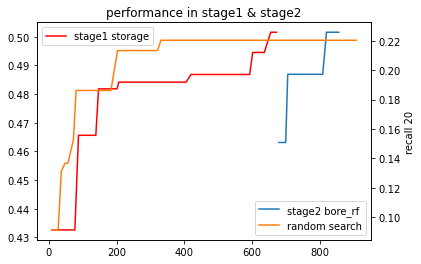

In [12]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()           # 做镜像处理
ax1.plot(time_list_stage1, performance_list_stage1, label='stage1 storage', c='r')
ax2.plot(time_list_stage2, performance_list_stage2, label='stage2 bore_rf')
ax2.plot(time_list_stage1_random, performance_list_stage1_random, label='random search')
plt.xlabel('time/s')
plt.ylabel('recall 20')
plt.title('performance in stage1 & stage2')
ax1.legend()
plt.legend()
plt.show()
### space(why two-stage?)
# decouple vs not decouple (in stage 1)
# reduce vs. not reduce
# random search vs. sub stage1 + stage2
# search algorithms (bore..)
### 可能筛选的模型太多，保留topk太少
# random(topk 3)
# setting of experiment

## score vs epoches

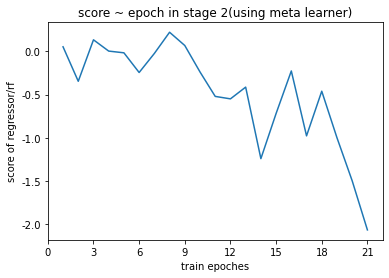

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

scores = [0.054010844907407596, -0.34568315972222186, 0.13503333333333356, 0.004307871941137464, -0.015721246924603083, -0.24389091954365116, -0.023155779702197288, 0.22278896207128684, 0.06900037318121699, -0.23758974769463292, -0.5209779629104732, -0.549469170138889, -0.4134266710069445, -1.2426042257369616, -0.7190854134778912, -0.2260511363162161, -0.9784615064247921, -0.4608069825660588, -1.0002491088764374, -1.4997522270186727, -2.0688307692699475]
# scores = [0.26233125, -0.07420249999999973, 0.20510813549107154, 0.6063311077714375, -0.8113761802248669, -0.7542691720403438, 0.15149874253885554, -0.03203224673091465, 0.013144063691525987, -0.32829404628579817, -0.25677738858654564, -0.4338853341416815, -0.7028556595804991, -0.4517005069056017, -0.7076874795209751, -0.22623181277557314, -1.0259423826152685, 0.04963280873724496, -0.5830800324517618, -1.2276706915391151, -2.1575810247174387]
gcp = plt.gca()#.xaxis.set_major_locator(MaxNLocator(integer=True))
gcp.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(list(range(1,len(scores)+1)), scores)
plt.xlabel('train epoches')
plt.ylabel('score of regressor/rf')
plt.title('score ~ epoch in stage 2(using meta learner)') # score bigger better
plt.show()
### predictor
# performance ~ sample number
# feature

## other test

In [8]:
time.time(), time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()) 
current_time = time.strftime("%Y-%m-%d-%H:%M:%S", time.localtime())
print(current_time)

2022-06-30-10:17:59


In [17]:
with open('arch_bore_rf_meta_log1.json','r') as f:
    data = json.load(f)
performance_list = data['performance_list']
arch_single_list = data['arch_single_list']
# performance_list

In [18]:
cur_best_list_s1 = [0.13808663483637912, 0.13808663483637912, 0.13808663483637912, 0.15164011856046705, 0.15164011856046705, 0.15164011856046705, 0.15705033725487452, 0.15705033725487452, 0.15705033725487452, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532, 0.19813809526447532]

recall_test_list = [0.1327288685392244, 0.12518899980437617, 0.1379838653629315, 0.11832905930489714, 0.15058336653187476, 0.09661283199135987, 0.1799392274538338, 0.1580683255170281, 0.11716836773247065, 0.14376516473914056, 0.1361509783235037, 0.1534387931053494, 0.20456985206077, 0.10725777207474906, 0.08932905268086384, 0.13570176224906183, 0.07371029058247647, 0.19838529134784824, 0.2229995241073949, 0.15373239507077224]
recall_test_list = [recall_test_list[0]] + [np.max(recall_test_list[:i]) for i in range(1,len(recall_test_list))]

recall_random_list = [0.14258654203637644, 0.0572631516021275, 0.11717185447676673, 0.0962456917813376, 0.18667949587423077, 0.10527756158460225, 0.2144288793997147, 0.06866741889095104, 0.14059824649948477, 0.10141195714347175, 0.11839991972451504, 0.13860094066384998, 0.20787520519993613, 0.09502539766315696, 0.12994638673818795, 0.13524012757967485, 0.17277064596771435, 0.12277049572857575, 0.18824701855896384, 0.2171027797042944]
recall_random_list = [recall_random_list[0]] + [np.max(recall_random_list[:i]) for i in range(1,len(recall_random_list))]

recall_gp_list = [0.13321261147510233, 0.11930797102600811, 0.040699262548075724, 0.1468896531399961, 0.17952592061252573, 0.06468013191831226, 0.14935871898557884, 0.16382978117047917, 0.12291846442551972, 0.0621857972504862, 0.17318229391521653, 0.14732096932519634, 0.13898864689339488, 0.15515560754174001, 0.1380272499433106, 0.14919143174077196, 0.17980162268870695, 0.07791654361801877, 0.16673376912391655, 0.15631220469946056]
recall_gp_list = [recall_gp_list[0]] + [np.max(recall_gp_list[:i]) for i in range(1,len(recall_gp_list))]
recall_mlp_list  = [0.1538717407582925, 0.1760786870482621, 0.15405782063802084, 0.1540486746786, 0.10714023938351123, 0.1429849571989347, 0.19767527367658677, 0.20881215478204618, 0.15483145298724973, 0.15316322148478967, 0.1238191649159555, 0.16860599072369295, 0.13787672929703051, 0.06411603960008884, 0.1594292707503981, 0.20745925741337415, 0.1540486746786, 0.14866782145895016, 0.1531097489051252, 0.14932432599887727]
recall_mlp_list = [recall_mlp_list[0]] + [np.max(recall_mlp_list[:i]) for i in range(1,len(recall_mlp_list))]


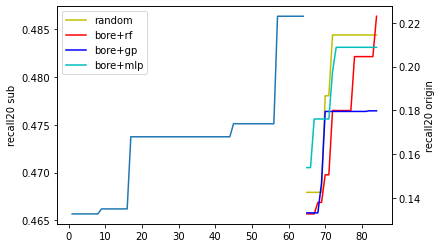

In [25]:
# import numpy as np
performance_list_curbest =  []
performance_list = np.array(performance_list)
for i in range(len(performance_list)):
    # print(i)
    if i == 0:
        cur_best_perf = performance_list[0]
    else:
        cur_best_perf = np.max(performance_list[:i])
    performance_list_curbest.append(cur_best_perf)
# plt.plot(list(range(len(performance_list))), performance_list_curbest, c = 'g')


fig,ax1 = plt.subplots()
ax2 = ax1.twinx()           # 做镜像处理

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
performance_list_curbest = [performance_list[0]] + [np.max(performance_list[:i]) for i in range(1,len(performance_list))]
ax1.plot(list(range(1, len(performance_list_curbest)+1)),performance_list_curbest)
ax2.plot(list(range(len(performance_list)+1, len(performance_list)+len(recall_random_list)+1)), recall_random_list, c = 'y', label='random')
ax2.plot(list(range(len(performance_list)+1, len(performance_list)+len(recall_test_list)+1)), recall_test_list, c = 'r', label='bore+rf')

ax2.plot(list(range(len(performance_list)+1, len(performance_list)+len(recall_gp_list)+1)), recall_gp_list, c = 'b', label='bore+gp')
ax2.plot(list(range(len(performance_list)+1, len(performance_list)+len(recall_mlp_list)+1)), recall_mlp_list, c = 'c', label='bore+mlp')
ax2.legend()
# plt.xlim(len(performance_list)+1, len(recall_mlp_list)+1)
plt.xlabel('trails')
ax1.set_ylabel('recall20 sub')
ax2.set_ylabel('recall20 origin')
# plt.ylabel('recall@20')
# plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(os.path.join('bore_meta', 'meta_stage2_figs.jpg'))
plt.show()
###### curve
# time analysis: train time 
# add classical vs ours set time
# xlabel->time, classical method
# model fit loss(regressor) classical 公平对比
# 2022年6月23日

In [20]:
# list_stage1 = [0.09348540295967378, 0.11967324501896107, 0.12285551447777232, 0.11865439485845546, 0.11834546512352687, 0.09155991629177344, 0.11650909132258908, 0.11822843247917807, 0.11436291510385566, 0.12121856389784762, 0.10546037852131383, 0.11476035026987647, 0.11199457326512428, 0.10718077357913784, 0.121002879618586, 0.1204542577140144, 0.11333537253604573, 0.11500816385710569, 0.11465903806585162, 0.12692640997042323]
list_stage2 = [0.1441254524668311, 0.05485818542998814, 0.14280227693529393, 0.1158631217454396, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.1370906283141701, 0.14584475717726786, 0.1441254524668311, 0.14413830378506087, 0.14309799898961548, 0.14413830378506087, 0.14413830378506087]
list_stage1 = [0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.1441247883369462, 0.1412324500438261, 0.14413830378506087, 0.14413830378506087, 0.1441254524668311, 0.14413830378506087, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.03770184668765706, 0.14432981616625615, 0.14413830378506087, 0.06645278667441852, 0.14413830378506087, 0.1441259303163824, 0.1441254524668311, 0.1441259303163824, 0.1441254524668311, 0.025933185706978897, 0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.1441248288326709, 0.14413830378506087, 0.03174073073514708, 0.1441254524668311, 0.14412760278981201, 0.14413830378506087, 0.14413830378506087, 0.14413830378506087, 0.14276079716449583, 0.1441254524668311, 0.1441247883369462, 0.14413830378506087, 0.14413830378506087, 0.14413830378506087, 0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.14443555050341694, 0.14412103640805385, 0.1441254524668311, 0.14413830378506087, 0.08628942607061625, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.14511082076216453, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.05485818542998814, 0.14280227693529393, 0.1158631217454396, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.1441254524668311, 0.14413830378506087, 0.1370906283141701, 0.14584475717726786, 0.1441254524668311, 0.14413830378506087, 0.14309799898961548, 0.14413830378506087, 0.14413830378506087]
# list_stage2 = [[0.09348540295967378, 0.050378120122694915], [0.11967324501896107, 0.06883820353546466], [0.12285551447777232, 0.07038871092907689], [0.11865439485845546, 0.06862841442132452], [0.11834546512352687, 0.0613736093930125], [0.09155991629177344, 0.04881214488084149], [0.11650909132258908, 0.06634874202137034], [0.11822843247917807, 0.0704627168659445], [0.11436291510385566, 0.0637013724908201], [0.12121856389784762, 0.0691294174032353], [0.10546037852131383, 0.054445989066121935], [0.11476035026987647, 0.06276762409574667], [0.11199457326512428, 0.0640998777563658], [0.10718077357913784, 0.059057731790400865], [0.121002879618586, 0.06850458254480059], [0.1204542577140144, 0.06922891337400788], [0.11333537253604573, 0.06602457070806224], [0.11500816385710569, 0.06299067758450842], [0.11465903806585162, 0.06619979975836039], [0.12692640997042323, 0.07313117150794675]]
# list_stage2 = [item[0] for item in list_stage2]
list_stage1 = [list_stage1[0]] + [np.max(list_stage1[:i]) for i in range(1, len(list_stage1))]
list_stage2 = [list_stage2[0]] + [np.max(list_stage2[:i]) for i in range(1, len(list_stage2))]

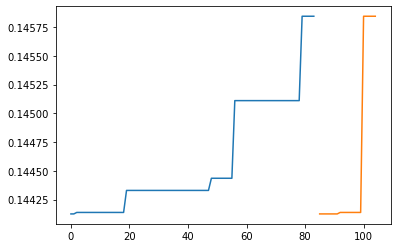

In [21]:
plt.plot(list(range(len(list_stage1))), list_stage1)
plt.plot(list(range(len(list_stage1)+1, len(list_stage1)+len(list_stage2)+1)), list_stage2)

In [22]:
list_stage2

[0.1441254524668311,
 0.1441254524668311,
 0.1441254524668311,
 0.1441254524668311,
 0.1441254524668311,
 0.1441254524668311,
 0.1441254524668311,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14413830378506087,
 0.14584475717726786,
 0.14584475717726786,
 0.14584475717726786,
 0.14584475717726786,
 0.14584475717726786]

In [23]:
# ### 没有用了

# # # ohenc.fit(hparams_list)
# # # hparams_list = np.array(hparams_list)

# # # ohenc.fit()
# # embedding_dim_list = np.array(list(range(1, 64+1, 1)))
# # original_data_size = embedding_dim_list.shape[0]
# # opt_list = np.random.choice(['Adagrad', 'Adam'], original_data_size)
# # lr_list = np.random.uniform(low=1e-4, high=1e-2, size=original_data_size)
# # weight_decay_list = np.random.uniform(low=1e-4, high=1e-1, size=original_data_size)
# # original_data_list = [{'opt': opt_list[i], 'lr': lr_list[i], 'embedding_dim': embedding_dim_list[i] ,\
# #                'weigh_decay': weight_decay_list[i]} for i in range(original_data_size)]
# # original_df = pd.DataFrame(original_data_list)
# # ohenc.fit_transform(original_df)


# # features = ohenc.transform(df).toarray()

# # reverse_data = reverse_one_hot(features, performance, ohenc)
# # print(pd.DataFrame(reverse_data))
# def make_features():
    
#     return features

# def reverse_one_hot(X, y, encoder):
#     reversed_data = [{} for _ in range(len(y))]
#     all_categories = list(itertools.chain(*encoder.categories_))
#     category_names = ['category_{}'.format(i+1) for i in range(len(encoder.categories_))]
#     category_lengths = [len(encoder.categories_[i]) for i in range(len(encoder.categories_))]

#     for row_index, feature_index in zip(*X.nonzero()):
#         category_value = all_categories[feature_index]
#         category_name = get_category_name(feature_index, category_names, category_lengths)
#         reversed_data[row_index][category_name] = category_value
#         reversed_data[row_index]['target'] = y[row_index]
#     return reversed_data


# def get_category_name(index, names, lengths):
#     counter = 0
#     for i in range(len(lengths)):
#         counter += lengths[i]
#         if index < counter:
#             return names[i]
#     raise ValueError('The index is higher than the number of categorical values')